In [1]:
# Evaluasi Model Prediksi Water Quality Index (WQI)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

sns.set(style="whitegrid")


In [5]:
## 1. LOAD DATA
preds_df = pd.read_csv("model_predictions_for_evaluation.csv")
summary_df = pd.read_csv("modeling_results_summary.csv")

print("Predictions data shape:", preds_df.shape)
display(preds_df.head())

print("\nModel summary:")
display(summary_df)



Predictions data shape: (656, 6)


,Actual,BestModel,LinearRegression,DecisionTree,RandomForest,SVR
0,78.663919,78.790581,80.933341,78.287758,78.790581,79.723414
1,77.499932,77.730780,79.484839,77.243865,77.730780,78.176069
2,78.605716,80.473490,77.101077,82.581687,80.473490,77.502328
3,78.577899,77.920101,81.220308,77.944256,77.920101,79.318606
4,80.111690,80.204210,81.877834,80.944318,80.204210,80.225907



Model summary:


,Model,R2_test,MAE_test,RMSE_test,R2_train,CV_R2_mean,CV_R2_std
0,Random Forest,0.958552,0.802104,1.152174,0.994736,0.958761,0.006808
1,SVR,0.910931,1.216404,1.688995,0.972130,0.915715,0.006109
2,Decision Tree,0.892236,1.375976,1.857806,0.978904,0.901153,0.003333
3,Linear Regression,0.732311,2.450219,2.928054,0.736683,0.732876,0.027423


In [7]:
## 2. HITUNG ULANG METRIK DARI PREDIKSI TEST
models = ["LinearRegression", "DecisionTree", "RandomForest", "SVR"]

metrics = []
for m in models:
    r2 = r2_score(preds_df["Actual"], preds_df[m])
    mae = mean_absolute_error(preds_df["Actual"], preds_df[m])
    rmse = np.sqrt(mean_squared_error(preds_df["Actual"], preds_df[m]))
    metrics.append({"Model": m, "R2": r2, "MAE": mae, "RMSE": rmse})

metrics_df = pd.DataFrame(metrics).sort_values("R2", ascending=False).reset_index(drop=True)
display(metrics_df)


,Model,R2,MAE,RMSE
0,RandomForest,0.958552,0.802104,1.152174
1,SVR,0.910931,1.216404,1.688995
2,DecisionTree,0.892236,1.375976,1.857806
3,LinearRegression,0.732311,2.450219,2.928054


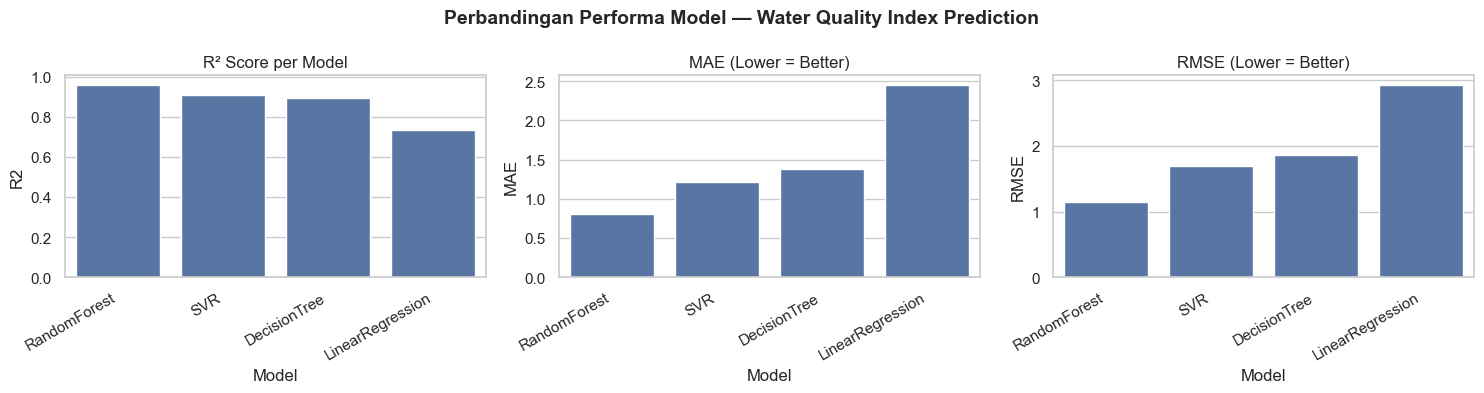

In [11]:
## 3. BANDINKAN PERFORMA MODEL (Visualisasi)
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

sns.barplot(x="Model", y="R2", data=metrics_df, ax=axes[0])
axes[0].set_title("R² Score per Model")

sns.barplot(x="Model", y="MAE", data=metrics_df, ax=axes[1])
axes[1].set_title("MAE (Lower = Better)")

sns.barplot(x="Model", y="RMSE", data=metrics_df, ax=axes[2])
axes[2].set_title("RMSE (Lower = Better)")

for ax in axes:
    ax.set_xticks(range(len(metrics_df["Model"].unique())))
    ax.set_xticklabels(metrics_df["Model"].unique(), rotation=30, ha='right')


plt.suptitle("Perbandingan Performa Model — Water Quality Index Prediction", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()


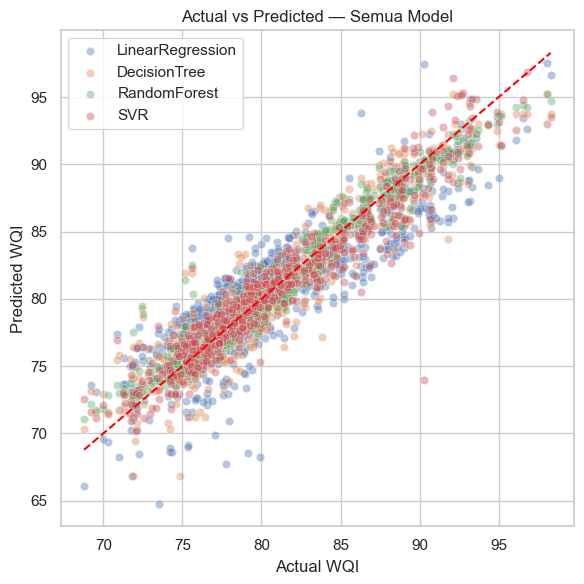

In [13]:
## 4. VISUALISASI: Actual vs Predicted (semua model)
plt.figure(figsize=(6,6))
for m in models:
    sns.scatterplot(x=preds_df["Actual"], y=preds_df[m], alpha=0.4, label=m)

plt.plot([preds_df["Actual"].min(), preds_df["Actual"].max()],
         [preds_df["Actual"].min(), preds_df["Actual"].max()],
         color='red', linestyle='--')
plt.xlabel("Actual WQI")
plt.ylabel("Predicted WQI")
plt.title("Actual vs Predicted — Semua Model")
plt.legend()
plt.tight_layout()
plt.show()


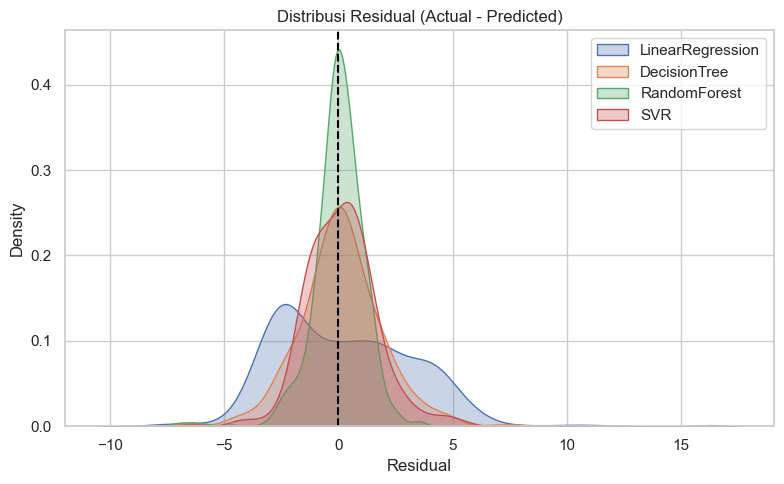

In [15]:
## 5. RESIDUAL ANALYSIS (Error Distribution)
residuals = pd.DataFrame()
residuals["Actual"] = preds_df["Actual"]

for m in models:
    residuals[m] = preds_df["Actual"] - preds_df[m]

# Plot residual distribution
plt.figure(figsize=(8,5))
for m in models:
    sns.kdeplot(residuals[m], label=m, fill=True, alpha=0.3)
plt.axvline(0, color="black", linestyle="--")
plt.title("Distribusi Residual (Actual - Predicted)")
plt.xlabel("Residual")
plt.legend()
plt.tight_layout()
plt.show()


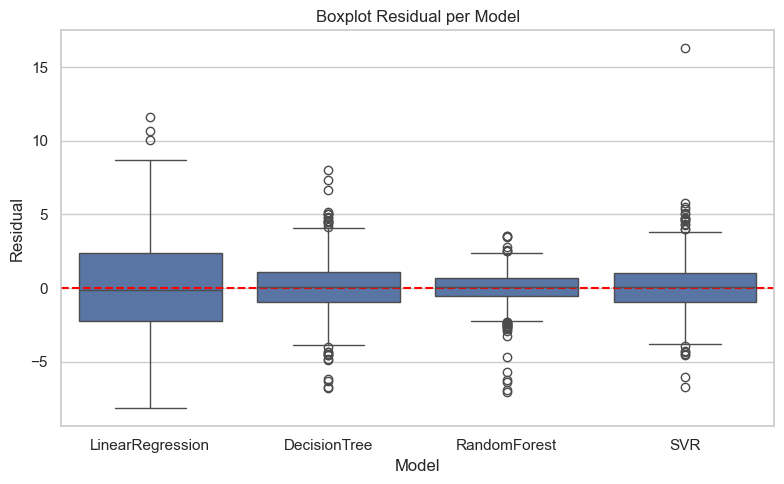

In [17]:
## 6. RESIDUAL BOXPLOT — Perbandingan Error
res_melted = residuals.melt(id_vars="Actual", var_name="Model", value_name="Residual")

plt.figure(figsize=(8,5))
sns.boxplot(x="Model", y="Residual", data=res_melted)
plt.axhline(0, color="red", linestyle="--")
plt.title("Boxplot Residual per Model")
plt.tight_layout()
plt.show()


In [19]:
## 7. RINGKASAN TEMUAN
best_model = metrics_df.iloc[0]["Model"]
print("📊 Model terbaik berdasarkan R²:", best_model)

if best_model == "RandomForest":
    print("\nRandom Forest memberikan keseimbangan terbaik antara akurasi dan stabilitas generalisasi.")
elif best_model == "LinearRegression":
    print("\nLinear Regression tampil sederhana namun efisien — data mungkin cukup linear.")
elif best_model == "SVR":
    print("\nSVR menunjukkan performa baik, kemungkinan data bersifat non-linear.")
else:
    print("\nDecision Tree menangkap pola non-linear sederhana tapi bisa overfitting pada data train.")

print("\nRekomendasi:")
print("- Gunakan model terbaik (", best_model, ") untuk deployment atau prediksi lanjutan.")
print("- Pertimbangkan fine-tuning tambahan atau stacking jika ingin meningkatkan performa.")


📊 Model terbaik berdasarkan R²: RandomForest

Random Forest memberikan keseimbangan terbaik antara akurasi dan stabilitas generalisasi.

Rekomendasi:
- Gunakan model terbaik ( RandomForest ) untuk deployment atau prediksi lanjutan.
- Pertimbangkan fine-tuning tambahan atau stacking jika ingin meningkatkan performa.


In [21]:
## 8. (OPSIONAL) SIMPAN HASIL EVALUASI
metrics_df.to_csv("evaluation_results_summary.csv", index=False)
print("Saved evaluation_results_summary.csv ✅")


Saved evaluation_results_summary.csv ✅


In [37]:
## 9. FEATURE IMPORTANCE (untuk Random Forest)
from joblib import load
# Load model pipeline
best_rf = load("model_random_forest_pipeline.pkl")

# Coba lihat isi pipeline-nya (untuk tahu nama step terakhir)
print(best_rf.named_steps.keys())

dict_keys(['scaler', 'rf'])


,Feature,Importance
0,ph,0.732508
7,Trihalomethanes,0.107457
8,Turbidity,0.063547
1,Hardness,0.037810
5,Conductivity,0.025603
4,Sulfate,0.018245
3,Chloramines,0.007582
2,Solids,0.003957
6,Organic_carbon,0.003291


C:\Users\calvin\AppData\Local\Temp\ipykernel_7408\3988095552.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feat_imp, palette="viridis")


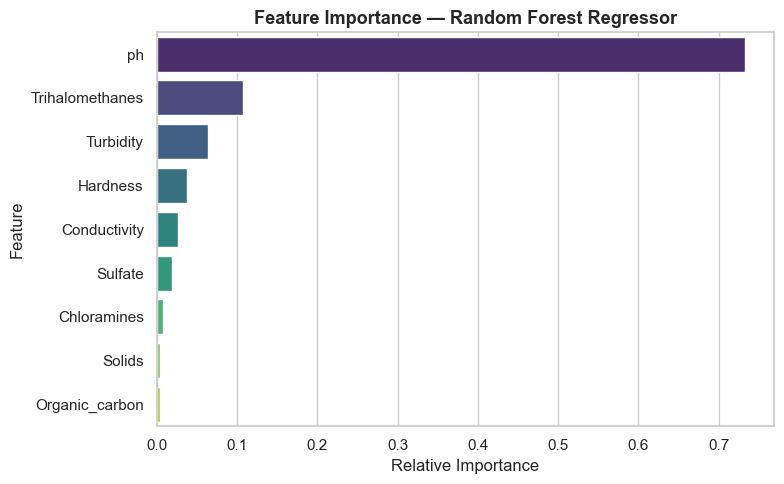

In [39]:
# Ambil feature importance dari step model di pipeline
importances = best_rf.named_steps['rf'].feature_importances_

# Nama fitur harus sama dengan input waktu training
feature_names = ["ph", "Hardness", "Solids", "Chloramines", "Sulfate",
                 "Conductivity", "Organic_carbon", "Trihalomethanes", "Turbidity"]

# Buat DataFrame untuk ditampilkan
feat_imp = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values("Importance", ascending=False)

# Tampilkan tabel
display(feat_imp)

# Visualisasi Feature Importance
plt.figure(figsize=(8,5))
sns.barplot(x="Importance", y="Feature", data=feat_imp, palette="viridis")
plt.title("Feature Importance — Random Forest Regressor", fontsize=13, fontweight="bold")
plt.xlabel("Relative Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()
